<a href="https://colab.research.google.com/github/ChingizIbnVaxob/data-science-practices/blob/main/22.04.24/1DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
import fastai
fastai.__version__

'2.7.14'

In [4]:
torch.__version__

'2.2.1+cu121'

In [17]:
from fastai.vision.all import *
from ipywidgets import widgets

#data
path = untar_data(URLs.PETS)/"images"

# labellovchi funksiya
def is_cat(x): return x[0].isupper()

# datalarni yuklovchi (dataloaders)

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid = 0.2, seed=42,
    label_func = is_cat, item_tfms=Resize(224)
)

# O'qitish (train)
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.162414,0.020604,0.993234,00:45


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


epoch,train_loss,valid_loss,accuracy,time
0,0.051673,0.048343,0.986468,00:46
1,0.028924,0.008184,0.995940,00:48


In [25]:
# uploading image

upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Is it cat?: True
Accuracy: 0.978


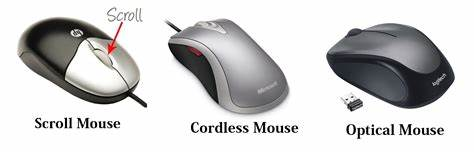

In [26]:
img = PILImage.create(upload.data[-1]) # image
pred, _, prob = learn.predict(img) # predicting
print(f'Is it cat?: {pred}')
print(f"Accuracy: {prob[1].item():.3f}")
img

Text(0.5, 1.0, 'X*70')

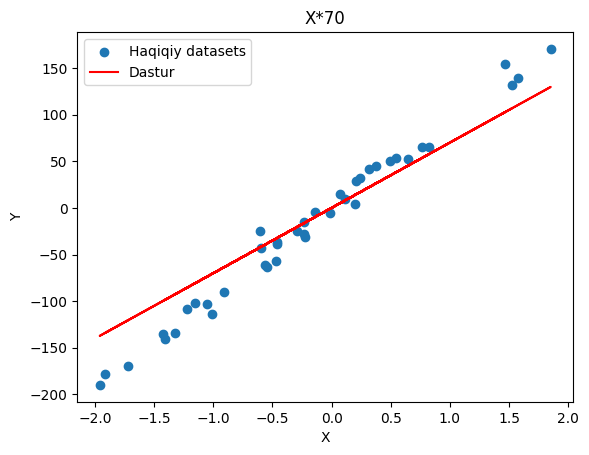

In [29]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# data
data = make_regression(n_samples=40, n_features=1, noise=10, random_state=42)
x_data, y_data = data[0], data[1]

plt.scatter(x_data, y_data, label="Haqiqiy datasets")

def classic_program(x): return x*70

y_pred = [classic_program(x) for x in x_data]

# plotting
plt.plot(x_data, y_pred, 'r', label='Dastur')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title('X*70')

Text(0.5, 1.0, '1.4*x*70')

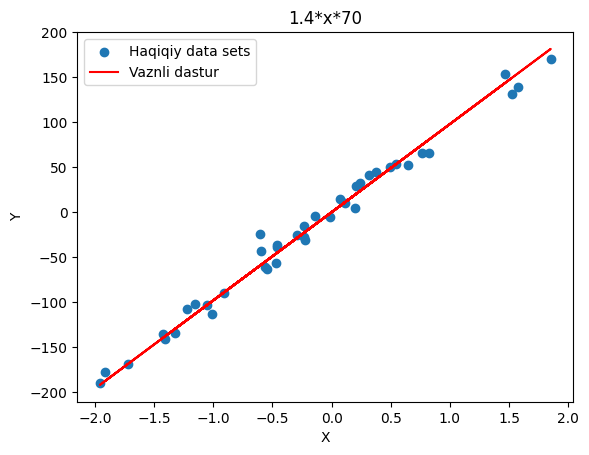

In [33]:
# data
data = make_regression(n_samples=40, n_features=1, noise=10, random_state=42)
x_data, y_data = data[0], data[1]


def weight_assigned_program(x, w): return w*x*70

w=1.4
y_pred = [weight_assigned_program(x, w) for x in x_data]

# plotting
plt.scatter(x_data, y_data, label="Haqiqiy data sets")
plt.plot(x_data, y_pred, 'r', label='Vaznli dastur')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title(f'{w}*x*70')

Text(0.5, 1.0, '94.448x+-0.243089')

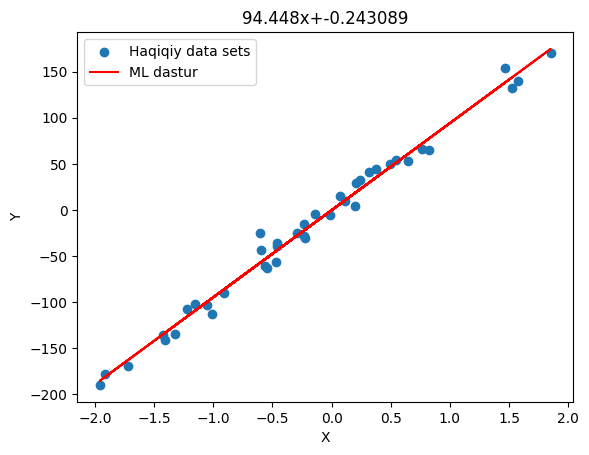

In [34]:
from sklearn.linear_model import LinearRegression

# data
data = make_regression(n_samples=40, n_features=1, noise=10, random_state=42)
x_data, y_data = data[0], data[1]


# regressiya
regression = LinearRegression().fit(x_data, y_data)
y_pred = regression.predict(x_data)

# plotting
plt.scatter(x_data, y_data, label="Haqiqiy data sets")
plt.plot(x_data, y_pred, 'r', label='ML dastur')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
equation = f'{regression.coef_[0]:.3f}x+{regression.intercept_:3f}'
plt.title(equation)

In [35]:
print(data)

(array([[-1.72491783],
       [-1.91328024],
       [-0.90802408],
       [-0.56228753],
       [ 0.2088636 ],
       [ 0.19686124],
       [ 1.52302986],
       [-0.01349722],
       [-1.01283112],
       [-1.42474819],
       [-0.23415337],
       [ 0.31424733],
       [ 0.0675282 ],
       [ 0.76743473],
       [-1.15099358],
       [ 0.82254491],
       [ 0.64768854],
       [-0.46947439],
       [-0.60170661],
       [-1.05771093],
       [ 0.49671415],
       [-1.32818605],
       [-0.46341769],
       [-1.4123037 ],
       [ 0.11092259],
       [-0.46572975],
       [-0.23413696],
       [ 1.46564877],
       [-0.54438272],
       [-0.29169375],
       [-1.95967012],
       [ 0.54256004],
       [-0.1382643 ],
       [ 0.37569802],
       [-0.2257763 ],
       [ 1.57921282],
       [ 1.85227818],
       [ 0.24196227],
       [-1.22084365],
       [-0.60063869]]), array([-169.31704036, -177.95873341,  -89.81793974,  -60.75330842,
         29.28641801,    4.1368241 ,  131.8376915 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


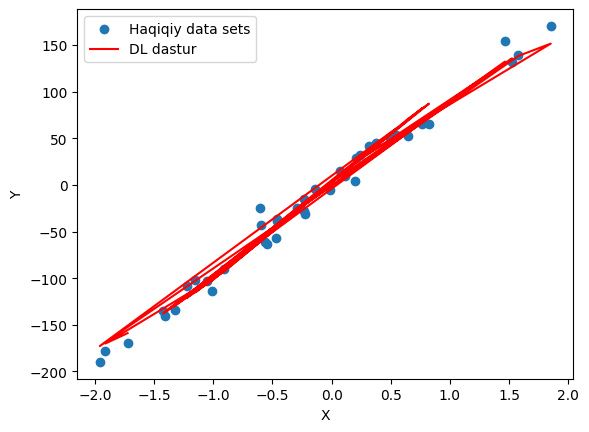

In [37]:
from sklearn.neural_network import MLPRegressor

# data
data = make_regression(n_samples=40, n_features=1, noise=10, random_state=42)
x_data, y_data = data[0], data[1]


# regressiya
regression = MLPRegressor(max_iter=2000).fit(x_data, y_data)
y_pred = regression.predict(x_data)

# plotting
plt.scatter(x_data, y_data, label="Haqiqiy data sets")
plt.plot(x_data, y_pred, 'r', label='DL dastur')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()